In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
np.random.seed(42)  # set random seed

# create dataset
data = {
    'product_id': range(1, 21),
    'product_name': [f'Product{i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),
    'sales_date': pd.date_range(start='2023-01-01', periods=20, freq='D'),
}
sales_data=pd.DataFrame(data)
print("sales_data:")
print(sales_data)

sales_data:
    product_id product_name     category  units_sold sales_date
0            1     Product1         Home          25 2023-01-01
1            2     Product2        Books          15 2023-01-02
2            3     Product3  Electronics          17 2023-01-03
3            4     Product4         Home          19 2023-01-04
4            5     Product5         Home          21 2023-01-05
5            6     Product6        Books          17 2023-01-06
6            7     Product7  Electronics          19 2023-01-07
7            8     Product8  Electronics          16 2023-01-08
8            9     Product9         Home          21 2023-01-09
9           10    Product10     Clothing          21 2023-01-10
10          11    Product11         Home          17 2023-01-11
11          12    Product12         Home          22 2023-01-12
12          13    Product13         Home          14 2023-01-13
13          14    Product14         Home          17 2023-01-14
14          15    Product15 

In [6]:
# save the dataframe to csv file
sales_data.to_csv("P:\\Downloads\\sales_data.csv",index=False)

In [8]:
import os
os.getcwd()

'C:\\Users\\Lenovo'

In [10]:
# Assuming your DataFrame is called df
sales_data 

# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

print("\nDescriptive statistics of Units Sold:")
print(descriptive_stats)

# Calculations
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_dev_sales = sales_data['units_sold'].std()

# Category-wise stats
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()

# Output
print('\nStatistical Analysis:')
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance Units Sold: {variance_sales}")
print(f"STD Units Sold: {std_dev_sales}")

print("\nCategory Statistics:")
print(category_stats)


Descriptive statistics of Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance Units Sold: 10.90526315789474
STD Units Sold: 3.3023117899275864

Category Statistics:
      category  sum       mean       std
0        Books  101  16.833333  2.714160
1     Clothing   21  21.000000       NaN
2  Electronics   73  18.250000  2.217356
3         Home  181  20.111111  3.723051


#  Inferntial stastics

In [13]:
confidence_level = 0.95
degress_freedom = len(sales_data['units_sold'])-1

sample_mean = mean_sales

sample_standard_error = std_dev_sales / np.sqrt(len(sales_data['units_sold']))

# t-score

t_score = stats.t.ppf((1+confidence_level)/2, degress_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("n confidence interval for the mean of units sold:")
print(confidence_interval)

n confidence interval for the mean of units sold:
(17.254470507823573, 20.34552949217643)


In [15]:
from scipy import stats

# One-sample t-test: test if mean units_sold is different from 20
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\n Hypothesis Testing:", t_statistic)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Hypothesis testing
if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


 Hypothesis Testing: -1.6250928099424466
T-statistic: -1.6250928099424466, p-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


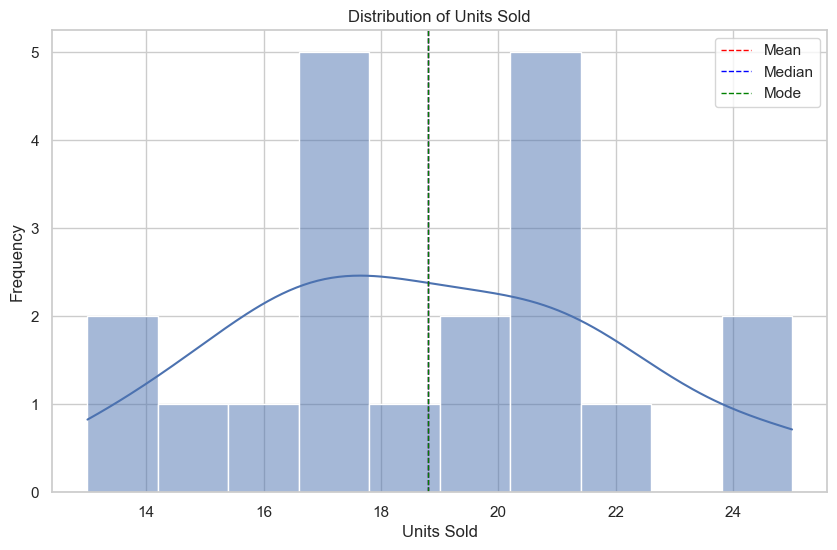

In [17]:
# Visualization

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_sales, color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mean_sales, color='green', linestyle='dashed', linewidth=1, label='Mode')
plt.legend()
plt.show()

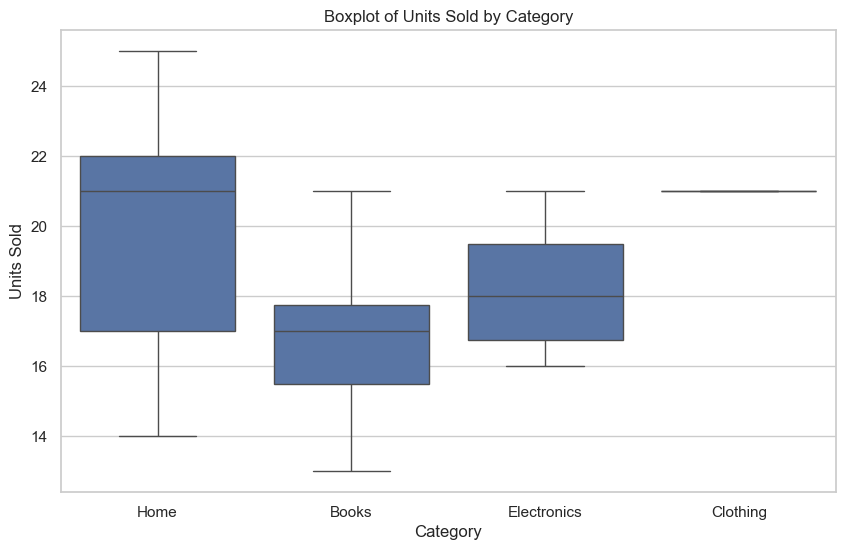

In [19]:
# Boxplot for the units sold

plt.figure(figsize=(10,6))
sns.boxplot(x='category',y="units_sold", data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category') 
plt.ylabel('Units Sold')
plt.show()

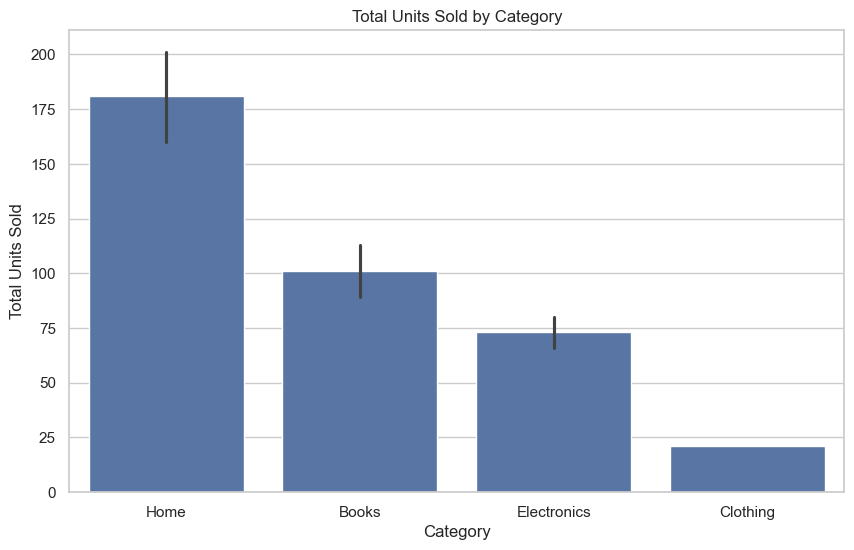

In [21]:
# bar plot for category wise units sold

plt.figure(figsize=(10,6))
sns.barplot(x='category', y='units_sold', data=sales_data, estimator=np.sum)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()